# Chapter 5 - Before and After

[See also the corresponding course notes, here.](../_build/html/chapter-5-before-and-after.html)

[View a printable version of these slides here.](./chapter-5-slides-printable.html)


## Coding

 * **Before:** Requirements you must check
 * **After:** Guarantees you can count on

## Communicating

 * **Before:** Say why you are running the code
 * **After:** Say what the output means

## Requirements

Before I run a piece of code, what requirements must be satisfied?

### Example:  Checking assumptions for a linear model

Before I fit a linear model to my data, I should ensure that the data is approximately linear (as well as several other assumptions that are not our focus here).

See example code on next slide...

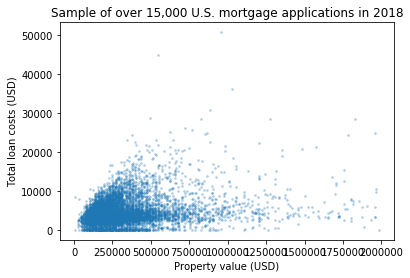

In [1]:
import pandas as pd
df = pd.read_csv( '../_static/practice-project-dataset-1.csv' )
import numpy as np
import matplotlib.pyplot as plt
two_cols = df[['property_value','total_loan_costs']].replace( 'Exempt', np.nan )
two_cols = two_cols.dropna().astype( float )
two_cols = two_cols[two_cols['property_value'] < 2000000]
plt.scatter( two_cols['property_value'], two_cols['total_loan_costs'], s=3, alpha=0.25 )
plt.title( 'Sample of over 15,000 U.S. mortgage applications in 2018' )
plt.xlabel( 'Property value (USD)' )
plt.ylabel( 'Total loan costs (USD)' )
plt.show()

Fitting a linear model to that data would have surely led to very poor predictions (among other potential problems that are not our focus here).

Let's fit the model, just to show how poor of a result it yields:

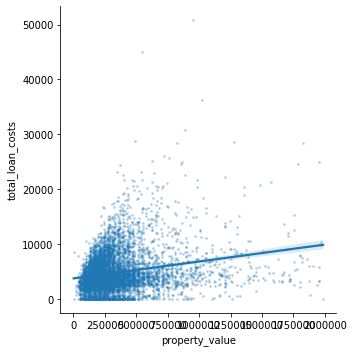

In [2]:
import seaborn as sns
sns.lmplot( x='property_value', y='total_loan_costs', data=two_cols, 
            scatter_kws={ "s":3, "alpha":0.25 } )
plt.show()

## Guarantees

What guarantees does each piece of code below provide?

```python
# Easy:
mean_height = df['Height (in)'].mean()

# Medium:
sales_people = employee_df[employee_df['Role'] == 'Sales']

# Tricky:
df.sort_values( 'Last Name' )
```

Bonus:  Name some requirements that each of those same pieces of code imposes.

## Communication

The best code notebooks explain their contents according to two rules:
 1. Before each piece of code, explain the motivation for the code.
 2. After each piece of code, explain what the output means.

**Connect the two!** Your output explanation should directly address your motivation for running the code.


### Example 1 from the course notes

Wrong way:

In [3]:
df['state_code'].value_counts().head( 10 )

CA    1684
FL    1136
TX    1119
PA     564
GA     558
OH     542
NY     535
NC     524
IL     508
MI     469
Name: state_code, dtype: int64

### Example 1 from the course notes

Another wrong way:

---

Remember that `state_code` is a two-character code for each state in the U.S.

In [4]:
df['state_code'].value_counts().head( 10 )

CA    1684
FL    1136
TX    1119
PA     564
GA     558
OH     542
NY     535
NC     524
IL     508
MI     469
Name: state_code, dtype: int64

Now we can proceed to do our analysis using the 10 states shown here.

### Example 1 from the course notes

Right way:

---

Which states have the most mortgage applications in our dataset?

In [4]:
df['state_code'].value_counts().head( 10 )

CA    1684
FL    1136
TX    1119
PA     564
GA     558
OH     542
NY     535
NC     524
IL     508
MI     469
Name: state_code, dtype: int64

Each state is shown next to the number of applications from that state in our dataset, largest first, then descending.  Here we show just the top 10.


### Example 2 from the course notes

Wrong way:

In [5]:
rates = df['interest_rate']
rates.describe()

count     10061
unique      500
top        4.75
freq        912
Name: interest_rate, dtype: object

### Example 2 from the course notes

Another wrong way:

---

We'd like to use the interest rates in the dataset to do some computation. If we do not assign the following computation to a variable, we won't be able to use it later.

In [6]:
rates = df['interest_rate']
rates.describe()

count     10061
unique      500
top        4.75
freq        912
Name: interest_rate, dtype: object

There are just over 10,000 non-null entries in the interest rate column, so the other approximately 5,000 entries have no value for interest rate.  Those 5,000 applications must not have been offered loans, or not gotten to a stage of completion where they were assigned an interest rate.

### Example 2 from the course notes

Right way:

---

We'd like to use the interest rates in the dataset to do some computation. What format are they currently stored in?

In [6]:
rates = df['interest_rate']
rates.describe()

count     10061
unique      500
top        4.75
freq        912
Name: interest_rate, dtype: object

The interest rates are written as percentages, since we see the most common one was 4.75 (instead of 0.0475, for example). However, they are currently stored as text (what pandas calls "dtype: object"), so we must convert them before using them. We stored them in the rates variable so we can manipulate it further later.